# Project 1



In [1]:
import numpy as np
from scipy.sparse import diags, bmat
from scipy.sparse.linalg import spsolve
from matplotlib import cm

In [2]:
def plot_solution(x, y, U, txt='Solution'):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    Y, X = np.meshgrid(y,x)
    ax.plot_surface(Y, X, U, cmap=cm.coolwarm)
    ax.view_init(azim=0)              # Rotate the figure
    plt.xlabel('y')
    plt.ylabel('x')
    plt.tight_layout()
    plt.title(txt)

In [3]:
def tridiag_sparse(a,b,c,N):
    bidiag_l = np.full(N-1, a)
    diag = np.full(N, b)
    bidiag_u = np.full(N-1, c)
    
    A = diags([bidiag_l, diag, bidiag_u],[-1,0,1])
    return A

In [4]:
def block_tridiag_sparse(A, B, C):
    N = B.shape[0]
    A = bmat([[B if i == j else A if i-j==-1 else C if i-j==1 else None for i in range(N)] for j in range(N)], format='bsr')
    #A = bmat([[B if i == j else A if i-j==-1 else C if i-j==1 else None for i in range(N)] for j in range(N)], format='csc')
    return A

In [17]:
def WIP(g, f, M, a):
    h = 1/M
    k = 2*h
    
    print(f"h = {h:.4}, k = {k:.4}")
    
    x = np.linspace(0,1,M+1)
    y = np.linspace(0,2,M+1)
    
    Y, X = np.meshgrid(y, x)
    
    #diags of B
    B = tridiag_sparse(a, -(10*a+2)/5, a, M-1)
    C = diags(np.full(M-2,1/5),1)
    
    A = block_tridiag_sparse(C.T, B, C)
    
    Y, X = np.meshgrid(y[1:-1], x[1:-1])
    f_vec = np.ravel(f(X,Y, a))
    #f_vec = np.ravel(f(x, y, a))
    
    
    U = np.reshape(spsolve(A, f_vec*h**2), (M-1,M-1))
    
    return x, y, U

In [33]:
M=100
import matplotlib.pyplot as plt

x = np.linspace(0,1,M+1)
y = np.linspace(0,2,M+1)

Y, X = np.meshgrid(y, x)

print(X)
print(Y)

def f(x,y, a):
   # U = -np.cos(X)*np.sin(Y)*(a+1)-4*np.cos(Y)*np.sin(X)-4*np.cos(X)*np.sin(Y)
    #U = -np.pi**2*np.sin(np.pi*X)*np.sin(np.pi*Y)*(a+1)+4*np.pi**2*np.cos(np.pi*X)*np.cos(np.pi*X)-4*np.pi**2*np.sin(np.pi*X)*np.sin(np.pi*Y)
    #U=np.sin(np.pi * x) * np.sin(np.pi * y) - np.pi**2 * np.sin(np.pi * x) * np.sin(np.pi * y) * (a + 1) + (2 * 2) * np.pi**(2) * np.cos(np.pi * x) * np.cos(np.pi * y)
    a1 = -np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)*(a+1)
    a2 = 4*np.pi**2*np.cos(np.pi*x)*np.cos(np.pi*y)
    a3 = -4*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)
    return (a1+a2+a3)

def u(x, y):
    return np.sin(x*np.pi)*np.sin(y*np.pi)


[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]
 [1.   1.   1.   ... 1.   1.   1.  ]]
[[0.   0.02 0.04 ... 1.96 1.98 2.  ]
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]
 ...
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]]


h = 0.01, k = 0.02


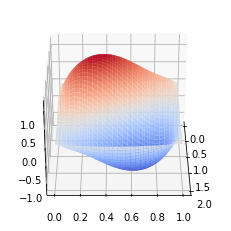

In [34]:
x, y, U = WIP(1, f, 100, 1)

Y, X = np.meshgrid(y[1:-1], x[1:-1])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Y, X, U, cmap=cm.coolwarm)
ax.view_init(azim=0)

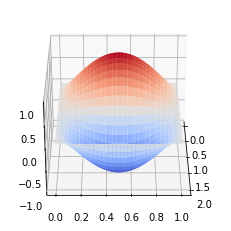

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Y, X = np.meshgrid(y,x)
ax.plot_surface(Y, X, u(X, Y), cmap=cm.coolwarm)
ax.view_init(azim=0)